In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
#plt.rcParams('font.family') = 'NanumGothicCoding'
#plt.rcParams('font.size') = 16
import matplotlib.font_manager as fm
font = 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=font, size=16).get_name()
plt.rc('font', family = fontprop)
plt.rc('font', size = 16)
import seaborn as sns

***
사람의 눈은 수백 줄의 텍스트만으로 이루어진 데이터를 읽거나 기초 통계 수치를 계산하는 방법으로는  
데이터를 제대로 분석할 수 없기때문에 데이터 전처리 과정에서 데이터의 숨겨진 패턴을 파악하기 위해  
데이터 시각화를 사용한다.
***
***
Anscombe 4분할 그래프  
***
데이터를 시각화하지 않고 수치만 확인했을 때 발생될 수 있는 함정을 보여주기 위한 그래프이다.  
Anscombe 데이터셋은 4개의 그룹으로 구성되어있으며 4개의 데이터 그룹은 각각 평균, 분산과 같은  
수치나 상관관계 회귀선이 모두 같다는 특징이 있다.  
그래서 결과를 보면 4개의 데이터셋의 데이터는 모두 같을 것이라는 착각을 할 수 있다.

In [2]:
#Anscombe 데이터셋은 seaborn 라이브러리에 포함되어 있다.
#seaborn 라이브러리의 load_dataset() 메소드의 인수로 'anscombe'을 전달하면 Anscombe 데이터셋을
#불러올수 있다.
anscombe = sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [3]:
anscombe[anscombe.dataset == 'I'].mean()

x    9.000000
y    7.500909
dtype: float64

In [4]:
anscombe[anscombe.dataset == 'II'].mean()

x    9.000000
y    7.500909
dtype: float64

In [5]:
anscombe[anscombe.dataset == 'III'].mean()

x    9.0
y    7.5
dtype: float64

In [6]:
anscombe[anscombe.dataset == 'IV'].mean()

x    9.000000
y    7.500909
dtype: float64

In [7]:
anscombe.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


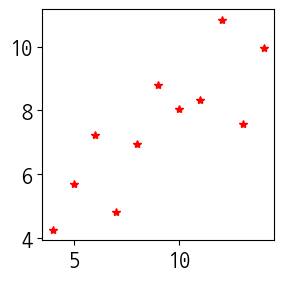

In [8]:
dataset1 = anscombe[anscombe.dataset == 'I']
plt.figure(figsize=[3, 3])
plt.plot(dataset1.x, dataset1.y, '*r')
plt.show()

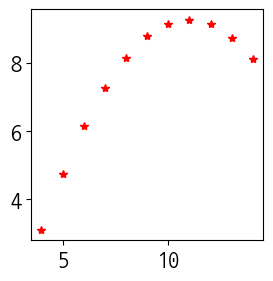

In [9]:
dataset2 = anscombe[anscombe.dataset == 'II']
plt.figure(figsize=[3, 3])
plt.plot(dataset2.x, dataset2.y, '*r')
plt.show()

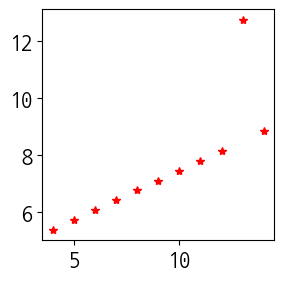

In [10]:
dataset3 = anscombe[anscombe.dataset == 'III']
plt.figure(figsize=[3, 3])
plt.plot(dataset3.x, dataset3.y, '*r')
plt.show()

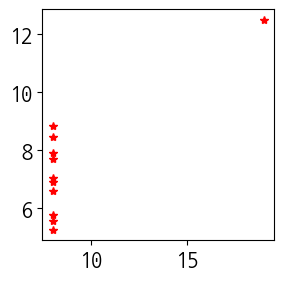

In [11]:
dataset4 = anscombe[anscombe.dataset == 'IV']
plt.figure(figsize=[3, 3])
plt.plot(dataset4.x, dataset4.y, '*r')
plt.show()

***
subplot
***

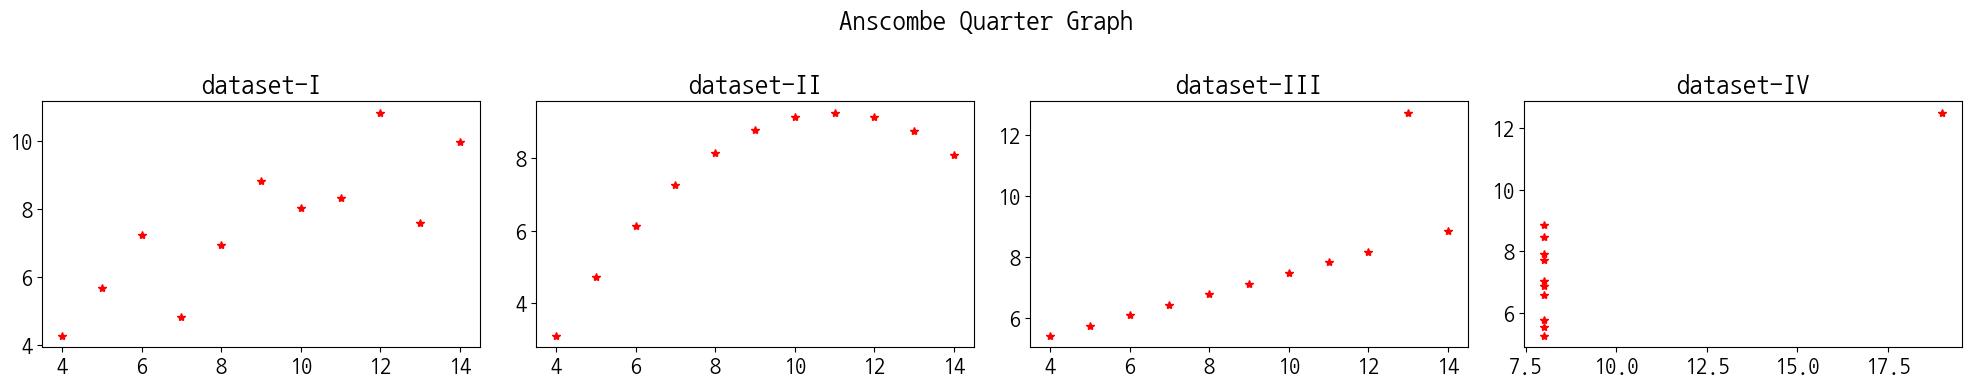

In [27]:
# figure() 메소드로 그래프 전체가 그려질 기본 틀을 만든다.
fig = plt.figure(figsize=[20 , 4])
# add_subplot 메소드로 그래프의 격자를 만든다. add_subplot(행, 열, 그래프 출력 위치) 
axes1 = fig.add_subplot(1, 4, 1)
axes2 = fig.add_subplot(1, 4, 2)
axes3 = fig.add_subplot(1, 4, 3)
axes4 = fig.add_subplot(1, 4, 4)
# plot() 메소드로 각 격자에 데이터를 전달해서 그래프를 그린다.
axes1.plot(dataset1.x, dataset1.y, '*r')
axes2.plot(dataset2.x, dataset2.y, '*r')
axes3.plot(dataset3.x, dataset3.y, '*r')
axes4.plot(dataset4.x, dataset4.y, '*r')
#set_title() 메소드로 각각의 그래프에 제목을 추가한다.
axes1.set_title('dataset-I')
axes2.set_title('dataset-II')
axes3.set_title('dataset-III')
axes4.set_title('dataset-IV')
#suptitle() 메소드로 그래프 전체 제목을 추가한다.
fig.suptitle('Anscombe Quarter Graph')
#그래프의 제목과 숫자가 겹쳐보이면 fig.tight_layout() 메소드를 실행한면 그래프의 레이아웃이 겹치지 않도록 조정한다.
fig.tight_layout()
plt.show() # 그래프를 출력한다.